In [2]:
import os
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Loading Data

In [3]:
DATA_PATH = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data/toy_data.csv")

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
cols_raw = list(df.columns)
cols_trash = ['Unnamed: 0', 'converged', 'accuracy']
cols_independent = ['total_energy']
cols_drop = cols_trash + cols_independent

cols_dependent = cols_raw.copy()
for element in cols_drop:
    cols_dependent.remove(element)


In [6]:
X_raw = df[cols_dependent]
y_raw = df[cols_independent]

In [7]:
X_raw.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Ti,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr
count,574.000000,574.000000,574.000000,574.0,574.0,574.0,574.0,574.0,574.0,574.0,...,574.0,574.0,574.0,574.0,574.0,574.0,574.0,574.0,574.0,574.0
mean,240.418118,0.229254,53.684669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,90.226587,0.145562,20.964190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.000000,0.100000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,180.000000,0.125000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,240.000000,0.166667,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,300.000000,0.250000,70.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,380.000000,0.500000,90.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train-Test-Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw,
    test_size=0.1,
    random_state=42)

# Pipeline Definition

## Linear Model with polynomial feature augmentation

In [9]:
def exp_decay(x, lambda_):
    return np.exp(-lambda_*x)

In [10]:
#DEFINITION OF PREPROCESSING STEPS
scaler = StandardScaler()
poly_augmentation = PolynomialFeatures(degree=3)

lambda_ = 1
exp_decay_augmentation = FunctionTransformer(lambda x : exp_decay(x, lambda_))

In [11]:
#DEFINITION OF REGRESSOR
linear_regressor = LinearRegression()
#regressor = GradientBoostingRegressor

In [12]:
#COMBINING EVERYTHING TO A PIPELINE
simple_model = Pipeline([
    ('poly', poly_augmentation),
    #('exp_decay', exp_decay_augmentation),
    ('scaler', scaler),
    ('regressor', linear_regressor)
])

In [13]:
simple_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [14]:
mse_test = mean_squared_error(y_test, simple_model.predict(X_test))
mse_train = mean_squared_error(y_train, simple_model.predict(X_train))
print(f"MSE:\ttrain:{mse_train}\ttest:{mse_test}")

MSE:	train:0.007879802558205246	test:0.009377753097521532


In [15]:
mape_test = mean_absolute_percentage_error(y_test, simple_model.predict(X_test))
mape_train = mean_absolute_percentage_error(y_train, simple_model.predict(X_train))
print(f"MAPE:\ttrain:{mape_train}\ttest:{mape_test}")

MAPE:	train:0.0002839384879951435	test:0.00031199446426135105


## Random Forest

In [16]:
rf_regressor = RandomForestRegressor()
rf_model = Pipeline([
    ('poly', poly_augmentation),
    ('scaler', scaler),
    ('regressor', rf_regressor)
])

In [17]:
rf_model.fit(X_train, y_train)

/Users/philipp/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [18]:
mse_test = mean_squared_error(y_test, rf_model.predict(X_test))
mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
print(f"MSE:\ttrain:{mse_train}\ttest:{mse_test}")

MSE:	train:5.414559632616656e-07	test:1.9540264195288082e-06


In [19]:
mape_test = mean_absolute_percentage_error(y_test, rf_model.predict(X_test))
mape_train = mean_absolute_percentage_error(y_train, rf_model.predict(X_train))
print(f"MAPE:\ttrain:{mape_train}\ttest:{mape_test}")

MAPE:	train:5.155673513433522e-07	test:1.7269176294817363e-06


# Visualization

In [20]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


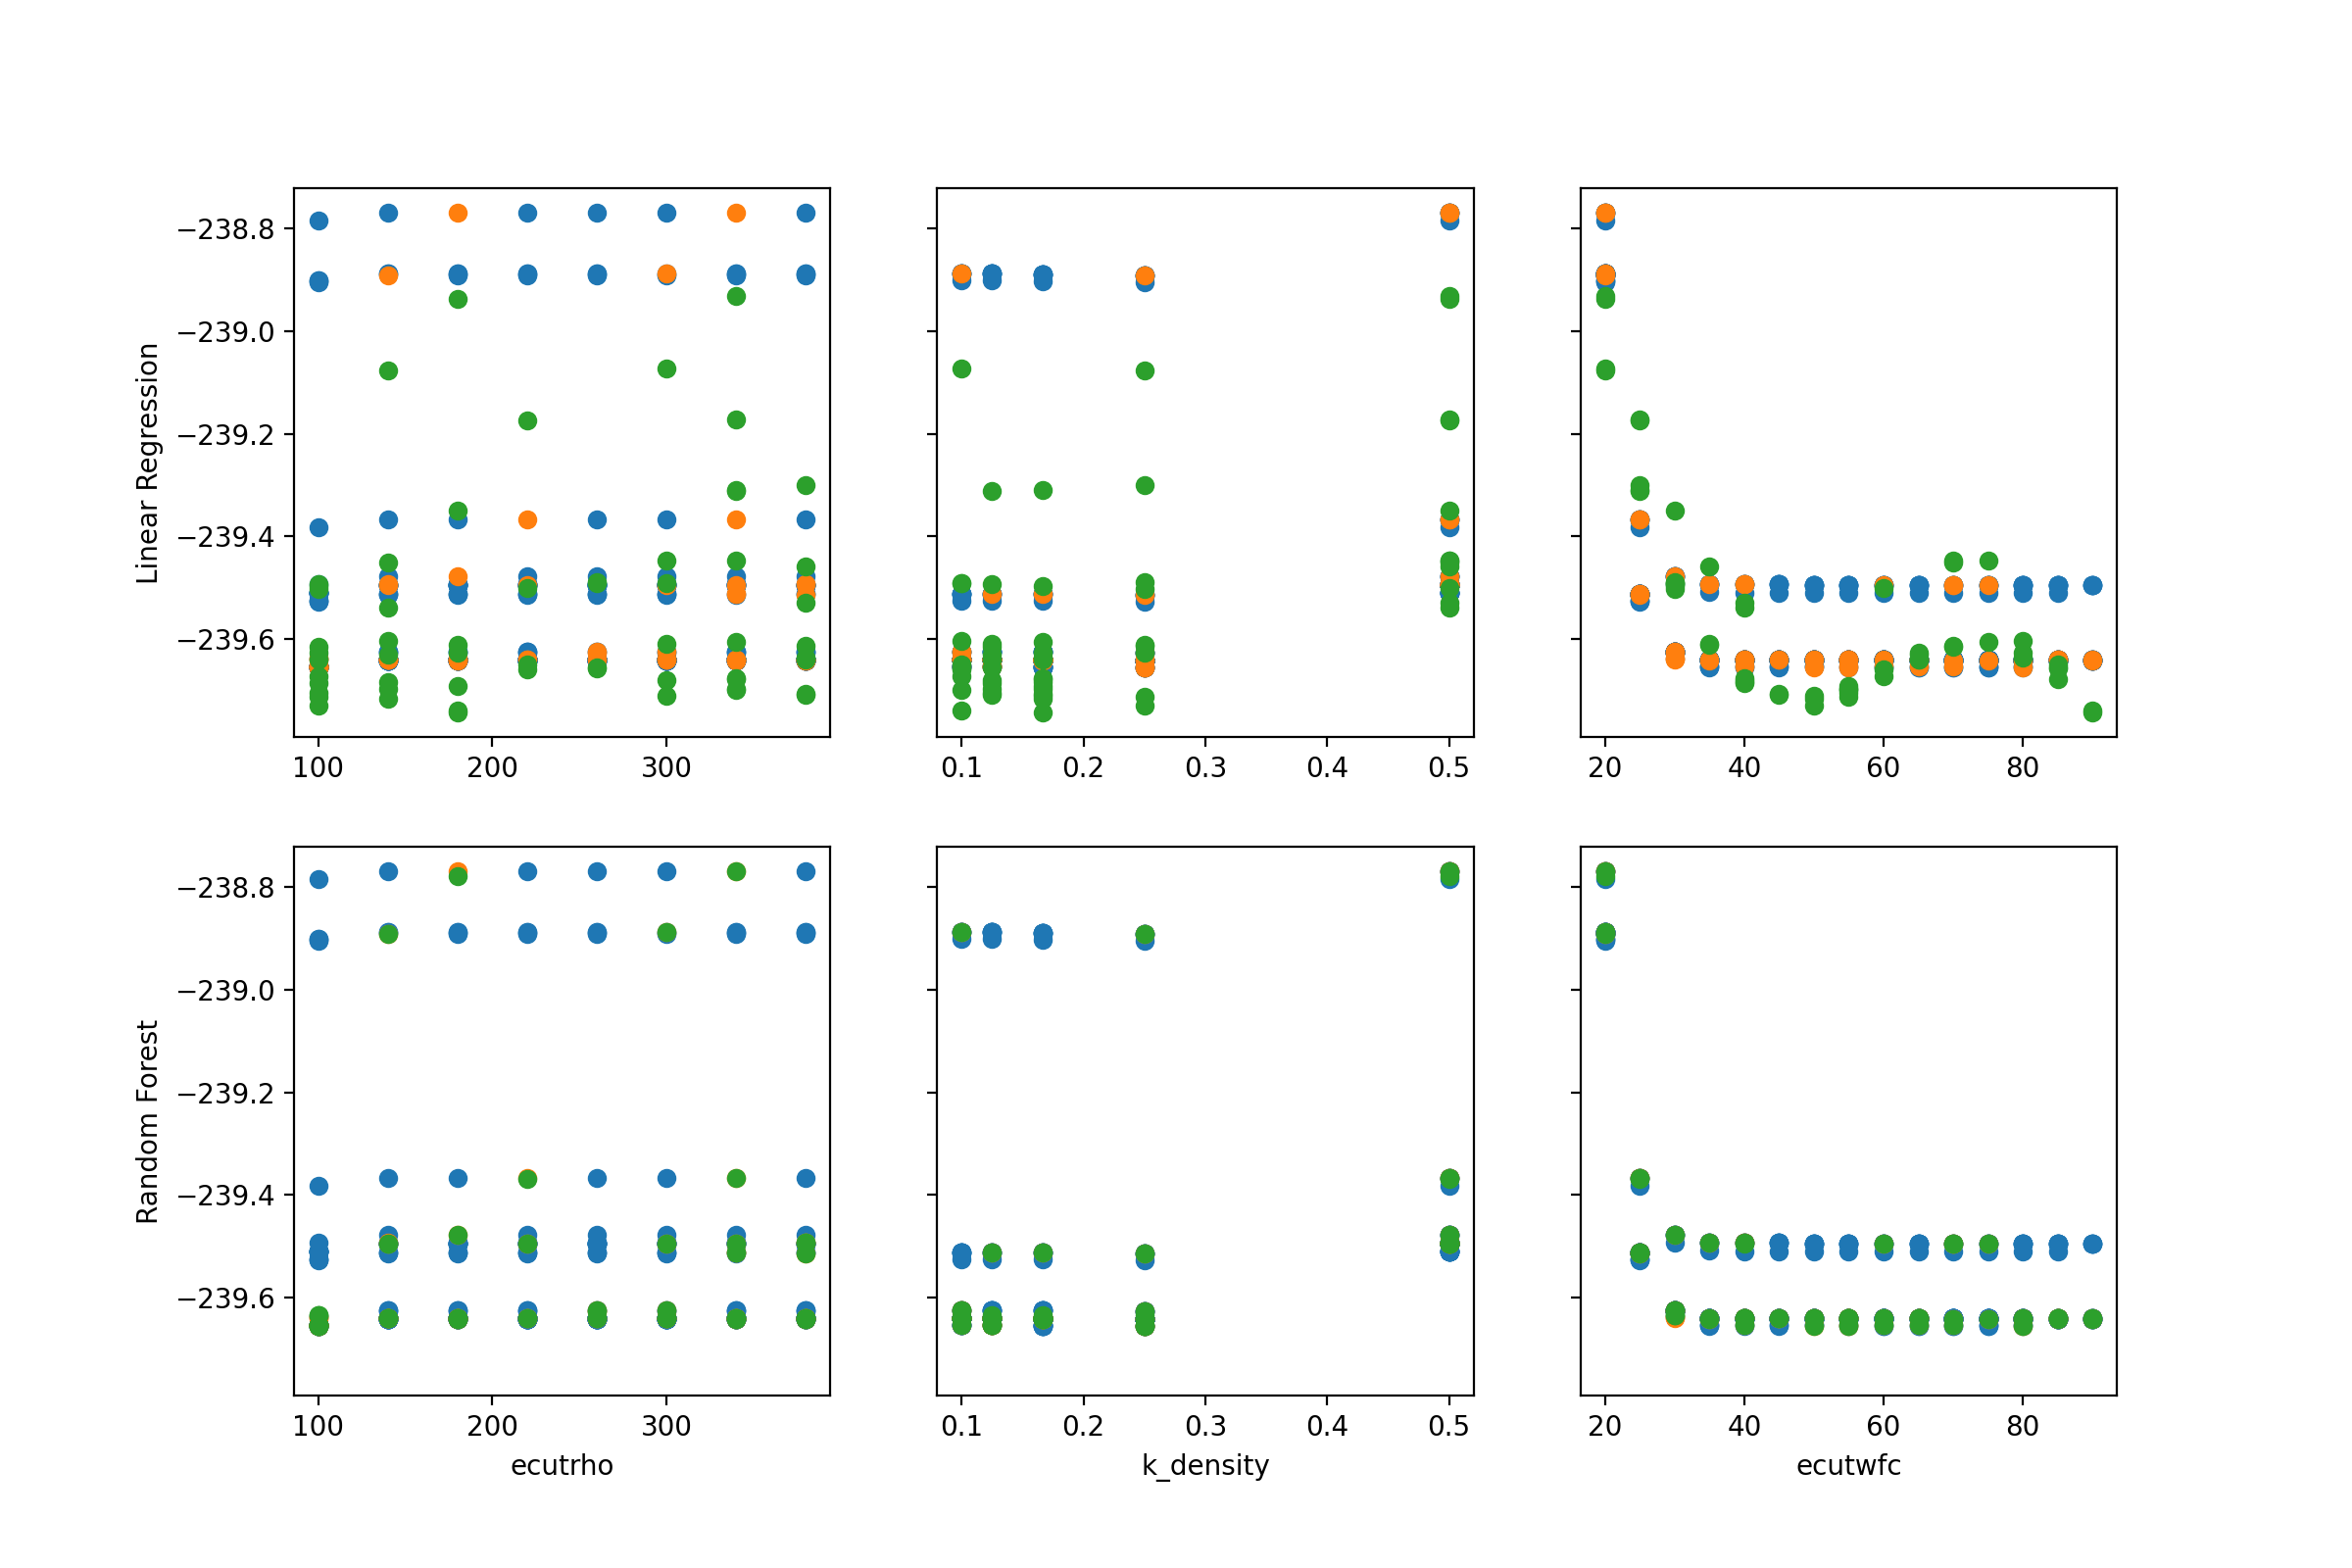

In [23]:
fig, ax = plt.subplots(2,3,figsize=(12,8), sharey=True)
models = [simple_model, rf_model]
for j, model in enumerate(models):
    for i, col in enumerate(X_train.columns[:3]):
        ax[j,i].scatter(X_train[col], y_train)
        ax[j,i].scatter(X_test[col], y_test)
        ax[j,i].scatter(X_test[col], model.predict(X_test))
ax[0,0].set_ylabel("Linear Regression")
ax[1,0].set_ylabel("Random Forest")
ax[1,0].set_xlabel("ecutrho")
ax[1,1].set_xlabel('k_density')
ax[1,2].set_xlabel('ecutwfc')
PLOTPATH = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "plots/simple_regression/toy_comparison.png")
plt.savefig(PLOTPATH)

In [24]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


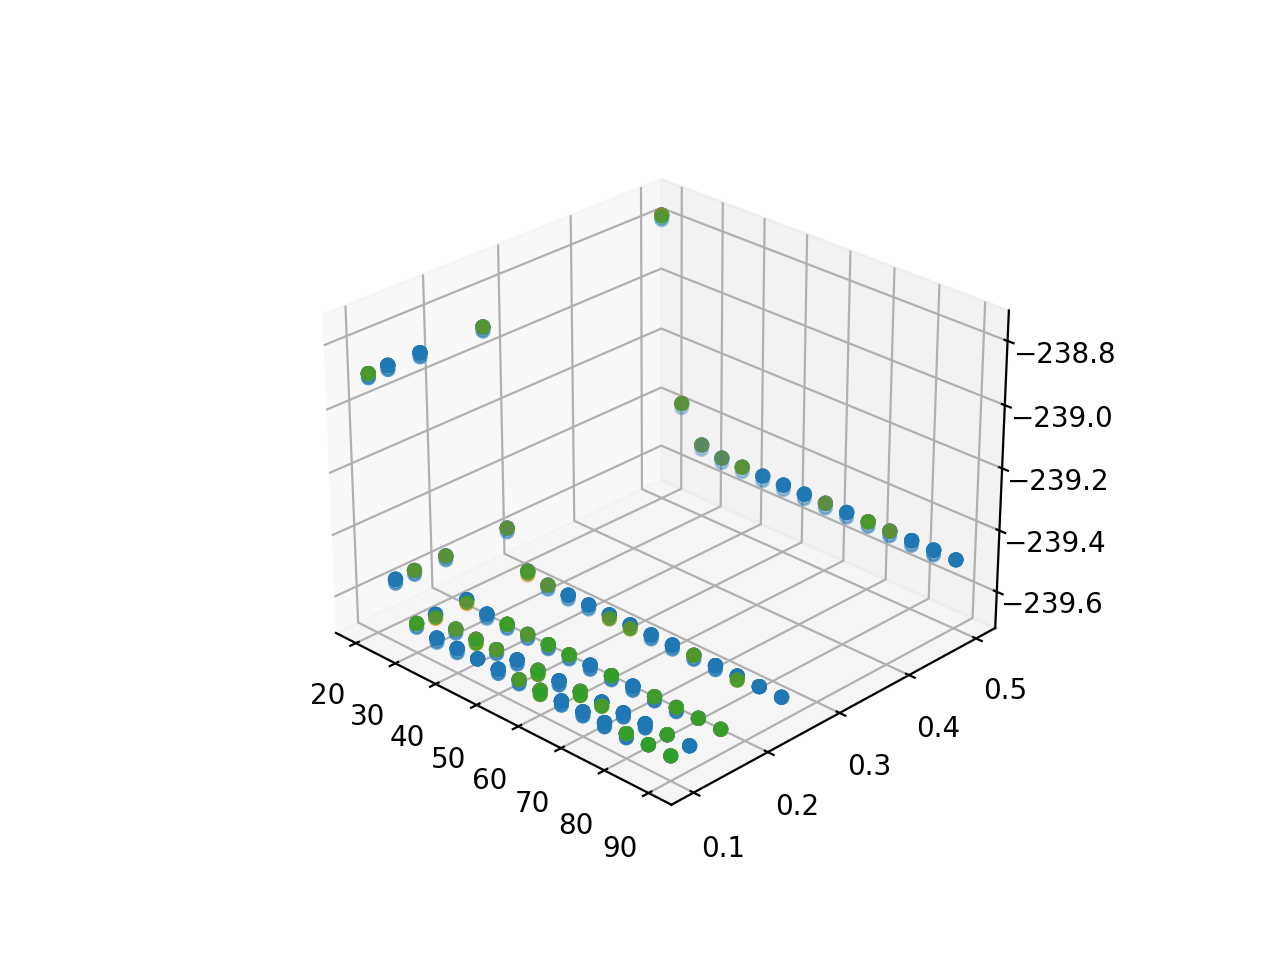

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['ecutwfc'], X_train['k_density'], y_train)
ax.scatter(X_test['ecutwfc'], X_test['k_density'], y_test)
ax.scatter(X_test['ecutwfc'], X_test['k_density'], rf_model.predict(X_test))